# Ejemplo 03
## Jaffet León Chávez

A continuación vamos a usar una red neuronal para... ¡Detectar fraudes bancarios! Esta red neuronal es mucho más compleja y requiere una cantidad mayor de poder de computo que la que generemos en el ejemplo anterior. Vamos a comenzar

In [2]:
# Librerías necearias

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from random import randint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import itertools
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


# Importemos el cuadro de datos

In [3]:
df=pd.read_csv('creditcard.csv')

# Hagamos una breve EDA

In [5]:
df.head(45)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Todos los datos nos sirven? Veamos...

In [6]:
y=df.pop('Class')
df.pop('Time')
x=df.values
y=np.array(y)
counter=(np.count_nonzero(y))
print("Datos sobre clientes no fraudulentos " + str(len(y)-counter))
print("Datos sobre clientes fraudulentos " + str(counter))
print("Porcentaje de no fraudulentos " +str(100*(1-(counter/len(y)))))
print("Porcentaje de fraudulentos "+str(100*((counter/len(y)))))

Datos sobre clientes no fraudulentos 284315
Datos sobre clientes fraudulentos 492
Porcentaje de no fraudulentos 99.82725143693798
Porcentaje de fraudulentos 0.1727485630620034


# No nos sirven todos. Filtremos la data que si nos sirve con un script de programación bastante elegante

In [11]:
x_stand=[]
y_stand=[]
for i in range(len(y)):
    if y[i]==1:
        x_stand.append(x[i])
        y_stand.append(1)
for r in range(2000):
    i=randint(0,len(y)-1)
    if y[i]==0:
        y_stand.append(0)
        x_stand.append(x[i])

x_stand=np.array(x_stand)
y_stand=np.array(y_stand)

# ¡Ahora si, con TODO! Vamos a generar nuestra red neuronal

In [8]:
epochs=90
model = keras.Sequential([
    keras.layers.Dense(64,input_shape=(29,),activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1920      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 18,626
Trainable params: 18,626
Non-trainable params: 0
_________________________________________________________________
None


# Compilación del modelo

In [12]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico=model.fit(x_stand, y_stand, epochs=epochs,validation_split=0.1,verbose=0)

In [ ]:
# Predicción

In [13]:
y = model.predict_classes(x_stand)

for i in range(len(x_stand)):
	print("X=%s, Predicted=%s" % (x_stand[i], y[i]))

X=[-2.31222654  1.95199201 -1.60985073  3.99790559 -0.52218786 -1.42654532
 -2.53738731  1.39165725 -2.77008928 -2.77227214  3.20203321 -2.89990739
 -0.59522188 -4.28925378  0.38972412 -1.14074718 -2.83005567 -0.01682247
  0.41695571  0.12691056  0.51723237 -0.03504937 -0.46521108  0.3201982
  0.04451917  0.1778398   0.261145   -0.14327587  0.        ], Predicted=1
X=[-3.04354062e+00 -3.15730712e+00  1.08846278e+00  2.28864362e+00
  1.35980513e+00 -1.06482252e+00  3.25574266e-01 -6.77936532e-02
 -2.70952836e-01 -8.38586565e-01 -4.14575448e-01 -5.03140860e-01
  6.76501545e-01 -1.69202893e+00  2.00063484e+00  6.66779696e-01
  5.99717414e-01  1.72532101e+00  2.83344830e-01  2.10233879e+00
  6.61695925e-01  4.35477209e-01  1.37596574e+00 -2.93803153e-01
  2.79798032e-01 -1.45361715e-01 -2.52773123e-01  3.57642252e-02
  5.29000000e+02], Predicted=0
X=[-2.30334957e+00  1.75924746e+00 -3.59744743e-01  2.33024305e+00
 -8.21628328e-01 -7.57875706e-02  5.62319782e-01 -3.99146578e-01
 -2.38253368

  0.22462655  0.05165637 -0.04642515 -0.07735265  1.        ], Predicted=0
X=[-0.73114042  0.37114737  0.34035915 -1.68467931  2.79819561  3.79636084
 -0.37155461  1.00428767  1.57398671 -1.32463928  0.79218042 -2.39871643
  1.45194434  1.58147405  0.36509317  0.08174108 -0.08713384  0.31315092
 -0.56127077 -0.13302611 -0.19431426 -0.45120475 -0.07800293  0.58811592
 -0.23462727 -0.95373479  0.04064036  0.14873053  1.51      ], Predicted=0
X=[ 1.11202585e+00 -2.74683847e-01  1.32951329e+00  8.07193801e-01
 -1.19969077e+00 -1.08889783e-01 -7.62506895e-01  2.45199592e-01
  7.61388447e-01 -5.40695898e-02  1.02998009e+00  8.28012711e-01
 -7.68080813e-01 -5.89142375e-02 -4.38628772e-01  3.33304033e-01
 -3.11401824e-01  2.79535494e-01  1.75173484e-01 -1.28051068e-01
 -3.10107423e-02  1.96790255e-02  4.73058934e-02  5.65485551e-01
  1.71554124e-01  2.88001296e-01  7.65506444e-03  1.87872802e-02
  1.49900000e+01], Predicted=0
X=[ 0.08265421  0.9231841  -0.24170592 -0.40925855  0.80681183 -0.50

  1.70100000e+01], Predicted=0
X=[-1.03812248  0.39791987  1.34066688 -0.14249261  0.60285708 -0.12751426
  0.37537688  0.22713998 -0.48457127 -0.04323049  1.18785925  0.45465139
 -0.29654897  0.3604239   0.50004933  0.22336988 -0.48865858 -0.15058119
  0.12011393 -0.02642642 -0.19448987 -0.40821557  0.43065235 -0.34579253
 -0.15750729  0.11228374  0.21040876  0.0456374   3.58      ], Predicted=0
X=[ 0.23922436  1.0107345  -0.43623886 -0.11068235  0.86805923 -1.33200311
  1.01784202 -0.33698566 -0.22862037 -1.03448733 -0.33007408  0.1310606
  0.69350727 -1.04701828  0.65602827 -0.03119813  0.53495053  0.56630361
 -0.25724017 -0.05938439  0.3222678   1.0990353  -0.20301242 -0.06395991
 -0.37709923 -0.15613234  0.15305164  0.1337847   3.03      ], Predicted=0
X=[-0.15073345  1.46198432 -0.09460564  0.97410759  0.08789459 -1.18622137
  0.67974196  0.13340295 -0.76395251 -0.02857232 -0.60208296  0.3698312
  0.49606987  0.7177822   0.57549105 -0.45766122 -0.00398784 -0.14185562
  0.37521354

  3.26700000e+01], Predicted=0
X=[-3.62255563e-01  1.06844941e+00  1.36207063e+00  9.44299060e-01
 -1.02278530e-01 -1.04901494e+00  6.79464253e-01 -6.87141141e-02
 -3.71891001e-01  2.33605034e-02 -4.28855511e-01 -6.55215936e-01
 -1.25543362e+00  5.74081593e-01  1.12971274e+00 -3.75022108e-01
 -4.31339152e-04  1.44606826e-01  2.86088847e-01  4.86759746e-02
  1.17781444e-01  4.47412998e-01 -1.09253814e-01  6.93193739e-01
 -2.78983949e-01 -3.33401524e-01  4.09915784e-01  2.27043521e-01
  1.45000000e+00], Predicted=0
X=[-9.18485463  6.7439762  -5.96933983 -0.80722095 -6.12719867 -1.32790196
 -6.0300217   7.16768615 -0.70893962 -1.40686799 -1.41783795  3.95088506
  1.46536023  4.52142417 -0.94423611  2.22444688  1.95589027  0.71846037
 -0.12288904 -1.44032616  0.65433143 -0.58516267  0.95863167  0.02011724
  0.28427429 -0.43035377 -3.53942525 -1.00909139  7.7       ], Predicted=0
X=[-4.94702545e+00 -7.80681497e-01 -1.78831517e+00 -2.49517142e+00
 -2.88429204e+00  5.08958223e-01 -1.75235040e

  5.00000000e+00], Predicted=0
X=[-0.43189427  0.80365275  1.6458932  -0.1168386   0.12533214 -0.24388565
  0.51153895  0.17387903 -0.71845266 -0.35157156  1.57257275  0.54279933
 -0.56203799  0.52913099  0.37599999  0.04838323 -0.27582893 -0.2920154
 -0.08814319 -0.103291   -0.05264996 -0.22438642  0.07174522  0.1977547
 -0.72361815  0.00280377  0.1106192   0.1353001   1.98      ], Predicted=0
X=[-1.41726378  1.55036596  0.62461074 -0.42229662 -0.18964568 -1.12304409
  0.41949074  0.67653691 -1.379184   -0.8966089   1.2275937   1.38815281
  0.50221738  1.03852496 -0.70848156  0.51488565 -0.38122088 -0.33089737
 -0.20792255 -0.31609434 -0.12308039 -0.80021868  0.06100183  0.52098488
 -0.22638221 -0.19115159 -0.34038751 -0.04986504 10.2       ], Predicted=0
X=[-6.84186845e-01  4.00630989e-01  2.62992110e+00  2.69880624e-01
  5.84425589e-02 -3.01926958e-01  3.43990561e-01 -7.55523001e-02
  4.02888490e-01 -6.68776128e-01 -8.48558927e-01  4.97197230e-01
  5.97244791e-01 -8.35623634e-01 -5.

  1.05657000e+03], Predicted=0
X=[ 1.90466094  0.53443941 -0.73619997  3.62891266  0.61927303  0.2801227
  0.14390629 -0.05531588 -1.238777    1.61150814  0.21326767  0.85755251
  1.05957448  0.12877137 -1.63826097  0.96651093 -1.20322957  0.28710132
 -1.21402869 -0.19428256  0.3279011   1.07082431 -0.08246917 -0.3630662
  0.27364643  0.24458814 -0.03160065 -0.06326573 10.62      ], Predicted=0
X=[-6.50215781e-01  6.93505509e-01  1.10523812e+00 -5.28966195e-01
  1.15883369e+00  7.11511205e-01  1.40531187e+00 -9.28443657e-02
 -1.03372290e+00 -3.64543434e-01  4.96159169e-01  3.11800223e-01
  4.01092053e-01  2.44249768e-01  2.97034628e-01  1.55274451e-01
 -8.11583218e-01 -2.22064776e-01  7.54212192e-01  3.09816957e-01
 -3.66579840e-01 -1.12710078e+00 -1.04662400e-01 -1.37156904e+00
  2.55182071e-01  8.12802994e-02 -1.94619545e-01 -1.81297981e-01
  9.14100000e+01], Predicted=0
X=[ 0.34901212  0.67804217 -0.73322894 -0.3604216   0.94911873  0.1479087
  0.21610744 -0.756715    0.02414988 -1.

# Bonus: Matriz de confusión

In [14]:
#SCRIPT DE DEEPLIZARD, AUTORÍA AJENA

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[406   7]
 [463   4]]


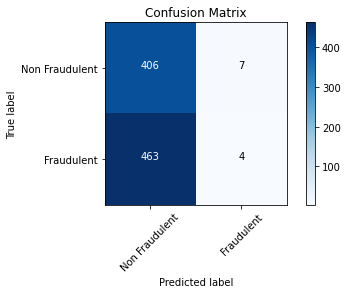

In [15]:
x_stand=[]
y_stand=[]
for i in range(len(y)):
    if y[i]==1:
        x_stand.append(x[i])
        y_stand.append(1)
for r in range(508):
    i=randint(0,len(y)-1)
    if y[i]==0:
        y_stand.append(0)
        x_stand.append(x[i])

x_stand=np.array(x_stand)
y_stand=np.array(y_stand)

comp=model.predict(x_stand)
comp=np.array([np.argmax(u) for u in comp])
cm = confusion_matrix(y_true=y_stand, y_pred=comp)
plot_confusion_matrix(cm=cm,classes=['Non Fraudulent','Fraudulent'],title='Confusion Matrix')
plt.show()